# **Fragment length frequency**

First we read in the file and compute fragment length for each data instance:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("query.bed", sep="\t", header=None, low_memory=False)
df["fragment_length"] = df[2] - df[1]

df.head()

,0,1,2,3,4,5,fragment_length
0,chr10,32795245,32795315,70,.,+,70
1,chr11,95864728,95864770,42,.,+,42
2,chr16,32027808,32027880,72,.,+,72
3,chr4,76608451,76608515,64,.,+,64
4,chr18,45847777,45847816,39,.,-,39


Next we find the frequencies of each fragment length and normalize it:

In [2]:
length_counts = [0 for _ in range(701)]

for length in df["fragment_length"].values:
    length_counts[length] += 1

total = sum(length_counts)
normalized_length_counts = [count / total for count in length_counts]

Then we plot:

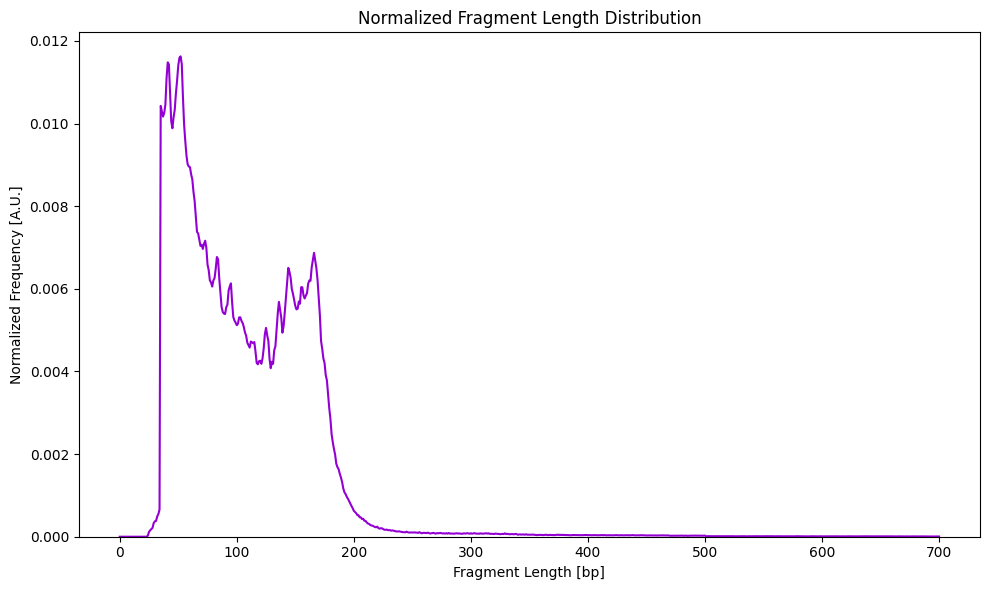

In [3]:
x = [i for i in range(701)]
y = [normalized_length_counts[i] for i in range(701)]

plt.figure(figsize=(10, 6))
plt.plot(x, y, color='darkviolet')
plt.xlabel("Fragment Length [bp]")
plt.ylabel("Normalized Frequency [A.U.]")
plt.title("Normalized Fragment Length Distribution")
plt.ylim(bottom=0)
plt.margins(y=0)
plt.tight_layout()
plt.show()

# **Rescaling**



First we read the reference data:

In [4]:
import pandas as pd

df1 = pd.read_csv("reference.hist", sep="\t", header=None)
df1.head()

,0,1
0,24,0.000013
1,25,0.000063
2,26,0.000092
3,27,0.000117
4,28,0.000136


Normalize the frequency:

In [5]:
df1[1] = df1[1] / df1[1].sum()

Now we find the target size of sample (a rough estimation, later the number of samples might change) and target counts of each length:

In [6]:
target_size = 4506430
target_counts = []
for i in range(701):
    if i >= 24:
        target_counts.append(int(df1.iloc[i-24][1] * target_size))
    else:
        target_counts.append(0)

Now we sample from the query data - the desired number of samples of each length is the minimum of available instances of that length in query data and the target count of that length:

In [7]:
sampled_lengths = []

for length in range(701):
    available = length_counts[length]
    target = target_counts[length]
    desired = min(target, available)
    if desired > 0:
        sample = df[df["fragment_length"] == length].sample(n=desired)
        sampled_lengths.extend(sample["fragment_length"].values)

Then from sampled data, we again do the same thing - find frequencies of each length and then normalize:

In [8]:
length_counts1 = [0 for _ in range(701)]

for length in sampled_lengths:
    length_counts1[length] += 1

total1 = sum(length_counts1)
normalized_length_counts1 = [count / total1 for count in length_counts1]

Then we plot:

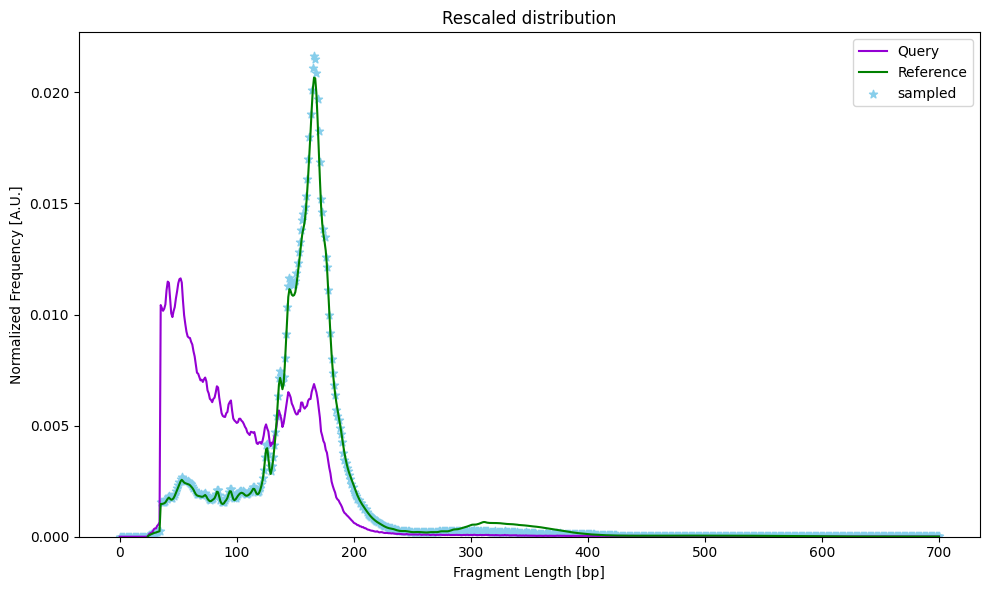

In [9]:
x1 = [i for i in range(701)]
y1 = [normalized_length_counts1[i] for i in range(701)]

plt.figure(figsize=(10, 6))
plt.plot(x, y, color='darkviolet', label='Query')
plt.plot(df1[0].values, df1[1].values, color='green', label='Reference')
plt.scatter(x1, y1, marker='*', color='skyblue', label='sampled')
plt.xlabel("Fragment Length [bp]")
plt.ylabel("Normalized Frequency [A.U.]")
plt.title("Rescaled distribution")
plt.ylim(bottom=0)
plt.margins(y=0)
plt.tight_layout()
plt.legend()
plt.show()